In [1]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from scipy.signal import convolve2d
from sklearn.decomposition import PCA
import os

In [2]:
def load_mat_file(file_path):
    data = scipy.io.loadmat(file_path)
    return data

# Specify the path to the .mat file
file_path = 'DataSets/TrainImages.mat'

# Load the .mat file data
mat_data = load_mat_file(file_path)

# Print the keys of the loaded data
print("Data keys:")
print(mat_data.keys())

# Access the data in the .mat file using the keys
mnist_data = mat_data['TrainImages']
print("MNIST data:")
print(mnist_data.shape)



Data keys:
dict_keys(['__header__', '__version__', '__globals__', 'TrainImages'])
MNIST data:
(60000, 28, 28)


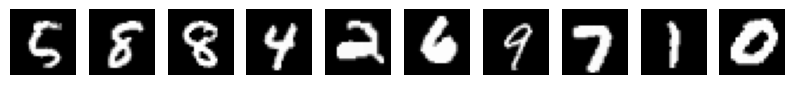

In [3]:
# visualize MNIST data
def visualize_mnist_data(data, num_images=10):
    fig = plt.figure(figsize=(10, 10))
    for i in range(num_images):
        img = data[2000+i]
        ax = fig.add_subplot(1, num_images, i + 1)
        ax.imshow(img, cmap='gray')
        ax.axis('off')
    plt.show()

visualize_mnist_data(mnist_data)



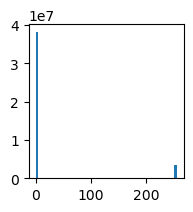

In [4]:
# plot the histogram of the MNIST data
def plot_histogram(data):
    fig = plt.figure(figsize=(2, 2))
    plt.hist(data.flatten(), bins=50)

plot_histogram(mnist_data)


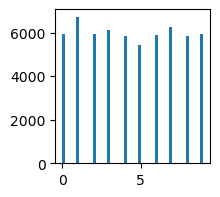

In [5]:
# load the MNIST labels
mnist_labels = load_mat_file('DataSets/TrainImageLabels.mat')['Labels'][0]
plot_histogram(mnist_labels)

#### Check if Mauro's images are the same as original MNIST images (ie, not preprocessed)

In [6]:
# # download the MNIST dataset
# mnist = fetch_openml('mnist_784', version=1, cache=True)

In [7]:
# # Get the data and labels
# X, y = np.array(mnist['data']), np.array(mnist['target'])

# def visualize_mnist(X, y, index):
#     image = X[index].reshape(28, 28)
#     label = y[index]

#     plt.figure(figsize=(2, 2))
#     plt.imshow(image, cmap='gray')
#     plt.title(f"Label: {label}")
#     plt.axis('off')
#     plt.show()

# # Visualize an example MNIST image
# example_index = 0
# visualize_mnist(X, y, example_index)


In [8]:
# # compare with Mauro's data
# plt.figure(figsize=(4, 4))
# # Mauro's data
# plt.subplot(1, 2, 1)
# plt.imshow(mnist_data[example_index], cmap='gray')
# plt.title(f"Mauro, Label: {mnist_labels[example_index]}")
# plt.axis('off')

# # original data
# plt.subplot(1, 2, 2)
# plt.imshow(X[example_index].reshape(28, 28), cmap='gray')
# plt.title(f"Original, Label: {y[example_index]}")
# plt.axis('off')


Mauro's and original are the same!

#### Preprocessing

In [9]:
# smooth the MNIST images by convolving 2 times with an averaging filter (a 3x3 all ones matrix)
def smooth_image(image, filter_size=3, num_iterations=2):
    # Create the averaging filter
    averaging_filter = np.ones((filter_size, filter_size)) / (filter_size ** 2)
    
    # Perform the convolution for the specified number of iterations
    smoothed_image = image.copy()
    for _ in range(num_iterations):
        smoothed_image = convolve2d(smoothed_image, averaging_filter, mode='same')

    return smoothed_image

# smooth the MNIST images
smoothed_mnist_data = np.array([smooth_image(image) for image in mnist_data])
smoothed_mnist_data.shape

(60000, 28, 28)

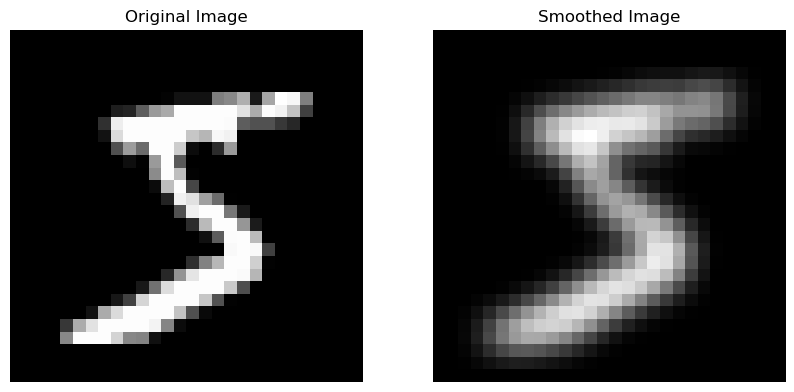

In [10]:
# visualize the smoothed image
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.imshow(mnist_data[0], cmap='gray')
ax1.set_title("Original Image")
ax1.axis('off')

ax2.imshow(smoothed_mnist_data[0], cmap='gray')
ax2.set_title("Smoothed Image")
ax2.axis('off')

plt.show()

In [11]:
### PCA ###

# flatten the smoothed MNIST data
smoothed_mnist_data_flat = smoothed_mnist_data.reshape(smoothed_mnist_data.shape[0], -1)

# Perform PCA
num_components = 50
pca = PCA(n_components=num_components)
pca_smoothed_data = pca.fit_transform(smoothed_mnist_data_flat)

# Example usage: Print the shape of the transformed data
print("Transformed data shape:", pca_smoothed_data.shape)

Transformed data shape: (60000, 50)


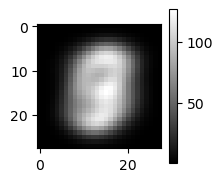

In [17]:
# plot mean image
plt.figure(figsize=(2, 2))
plt.imshow(pca.mean_.reshape(28, 28), cmap='gray')
plt.colorbar()

In [24]:
# save results
os.makedirs('myDataSets/mnist', exist_ok=True)
np.save('myDataSets/mnist/pca_mean.npy', pca.mean_)
np.save('myDataSets/mnist/pca_components.npy', pca.components_)
np.save('myDataSets/mnist/pca_smoothed_data.npy', pca_smoothed_data)
np.save('myDataSets/mnist/smoothed_data.npy', smoothed_mnist_data_flat)
np.save('myDataSets/mnist/labels.npy', mnist_labels)